# Predicting Outcome of Survival of Horses by Decision Tree and Random Forest Classification

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
horse = pd.read_csv('horse.csv')

In [3]:
horse.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [4]:
#Count values where isnull
horse.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

X = horse.drop(['outcome'], axis = 1)

imp_mostfreq = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp_mostfreq.fit(X)
X_imp = imp_mostfreq.transform(X)

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_imp)

x = enc.transform(X_imp).toarray()

In [7]:
y = horse['outcome']

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
le.classes_

array(['died', 'euthanized', 'lived'], dtype=object)

In [9]:
le.transform(y)

array([0, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 0, 2,
       2, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=5)

In [33]:
from sklearn import tree
DTclf = tree.DecisionTreeClassifier()
DTclf = clf.fit(X_train, y_train)

In [60]:
DTpred_y = DTclf.predict(X_test)

In [61]:
DTproba_y = DTclf.predict_proba(X_test)

[Text(286.8658288043478, 210.645, 'X[656] <= 0.5\ngini = 0.558\nsamples = 239\nvalue = [62, 35, 142]'),
 Text(257.85513586956523, 197.055, 'X[675] <= 0.5\ngini = 0.615\nsamples = 193\nvalue = [61, 35, 97]'),
 Text(217.30157608695652, 183.465, 'X[439] <= 0.5\ngini = 0.639\nsamples = 166\nvalue = [60, 34, 72]'),
 Text(179.1361956521739, 169.875, 'X[614] <= 0.5\ngini = 0.645\nsamples = 94\nvalue = [42, 23, 29]'),
 Text(145.74717391304347, 156.285, 'X[689] <= 0.5\ngini = 0.638\nsamples = 85\nvalue = [40, 23, 22]'),
 Text(139.9245652173913, 142.695, 'X[446] <= 0.5\ngini = 0.652\nsamples = 79\nvalue = [34, 23, 22]'),
 Text(90.61434782608696, 129.10500000000002, 'X[0] <= 0.5\ngini = 0.619\nsamples = 59\nvalue = [30, 13, 16]'),
 Text(35.66347826086957, 115.515, 'X[655] <= 0.5\ngini = 0.557\nsamples = 43\nvalue = [25, 5, 13]'),
 Text(11.645217391304348, 101.925, 'X[434] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]'),
 Text(5.822608695652174, 88.33500000000001, 'gini = 0.0\nsamples = 1\n

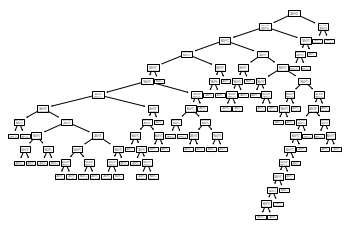

In [39]:
tree.plot_tree(DTclf)

In [57]:
DTclf.score(X_test,y_test)

0.6166666666666667

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [51]:
RFclf = RandomForestClassifier(max_depth=5, random_state=0)
RFclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [52]:
RFpred_y = RFclf.predict(X_test)

In [53]:
RFproba_Y = RFclf.predict_proba(X_test)

In [58]:
RFclf.score(X_test,y_test)

0.65

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, DTpred_y)

array([[ 8,  1,  6],
       [ 3,  2,  4],
       [ 7,  2, 27]])

In [63]:
confusion_matrix(y_test, RFpred_y)

array([[ 3,  0, 12],
       [ 0,  0,  9],
       [ 0,  0, 36]])